In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from fleck import generate_spots, Stars
from scipy.stats import anderson_ksamp

/Users/bmmorris/anaconda/lib/python3.5/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


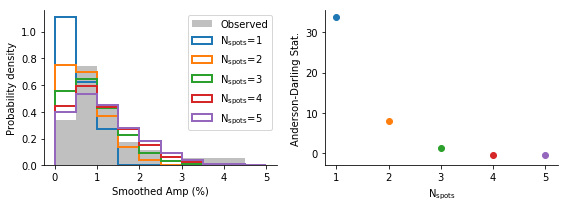

In [86]:
n_spots = 3
spot_radius = 0.25
amps_fast = np.loadtxt('data/amps_fast.txt')

min_lat = 70

n_inclinations = 5000
inclinations = (180*np.random.rand(n_inclinations) - 90) * u.deg
u_ld = [0.5079, 0.2239]

stars = Stars(spot_contrast=0.7, n_phases=30, u_ld=u_ld)

bin_range = [0, 5]

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].hist(amps_fast, density=True, histtype='stepfilled', 
           range=bin_range, label='Observed', color='silver');

for n_spots in range(1, 6):
    lons, lats, radii, inc_stellar = generate_spots(min_latitude=70, max_latitude=90, 
                                                    spot_radius=spot_radius, 
                                                    n_spots=n_spots, inclinations=inclinations)
    lcs = stars.light_curves(lons, lats, radii, inc_stellar)
    smoothed_amp = 100 * lcs.ptp(axis=0)
    ax[0].hist(smoothed_amp, density=True, 
              histtype='step', range=bin_range, lw=2, label="$\\rm N_{{spots}}$={0}".format(n_spots));

    ax[1].scatter(n_spots, anderson_ksamp([smoothed_amp, amps_fast]).statistic)
    
ax[0].legend()
ax[0].set(xlabel='Smoothed Amp (%)', ylabel='Probability density')
ax[1].set(xlabel='$\\rm N_{spots}$', ylabel='Anderson-Darling Stat.')
for axis in ax: 
    for s in ['right', 'top']: 
        axis.spines[s].set_visible(False)
fig.tight_layout()
fig.savefig('plots/n_spots.pdf', bbox_inches='tight')
plt.show()

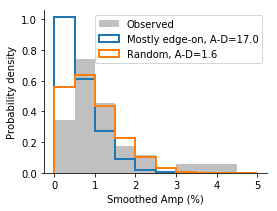

In [92]:
spot_radius = 0.25
n_spots = 3

n_incs = 10000
spreads = range(0, 180, 10)
incs = [(30*np.random.rand(n_incs) + 70)*u.deg,
        (180*np.random.rand(n_incs) - 90)*u.deg]

plt.figure(figsize=(4, 3))
plt.hist(amps_fast, density=True, histtype='stepfilled', 
         range=bin_range, label='Observed', color='silver');

adstat = []
labels = ['Mostly edge-on', 'Random']
for inclinations, label in zip(incs, labels):
    lons, lats, radii, inc_stellar = generate_spots(min_latitude=70, max_latitude=90, 
                                                    spot_radius=spot_radius, 
                                                    n_spots=n_spots, inclinations=inclinations)
    lcs = stars.light_curves(lons, lats, radii, inc_stellar)
    smoothed_amp = 100 * lcs.ptp(axis=0)
    ad = anderson_ksamp([smoothed_amp, amps_fast]).statistic

    plt.hist(smoothed_amp, density=True, 
             histtype='step', range=bin_range, lw=2, label=label + ", A-D={0:.1f}".format(ad))
    adstat.append(ad)    
plt.xlabel('Smoothed Amp (%)')
plt.ylabel('Probability density')
plt.legend()
for s in 'right top'.split(): 
    plt.gca().spines[s].set_visible(False)
plt.savefig('plots/random_incs.pdf', bbox_inches='tight')

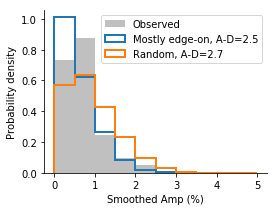

In [93]:
amps_slow = np.loadtxt('data/amps_slow.txt')

best_radius = 0.22
min_lat = 70

plt.figure(figsize=(4, 3))
plt.hist(amps_slow, density=True, histtype='stepfilled', 
         range=bin_range, label='Observed', color='silver');

adstat = []
labels = ['Mostly edge-on', 'Random']
for inclinations, label in zip(incs, labels):
    lons, lats, radii, inc_stellar = generate_spots(min_latitude=70, max_latitude=90, 
                                                    spot_radius=spot_radius, 
                                                    n_spots=n_spots, inclinations=inclinations)
    lcs = stars.light_curves(lons, lats, radii, inc_stellar)
    smoothed_amp = 100 * lcs.ptp(axis=0)
    ad = anderson_ksamp([smoothed_amp, amps_slow]).statistic

    plt.hist(smoothed_amp, density=True, 
             histtype='step', range=bin_range, lw=2, label=label + ", A-D={0:.1f}".format(ad))
    adstat.append(ad)    
plt.xlabel('Smoothed Amp (%)')
plt.ylabel('Probability density')
plt.legend()
for s in 'right top'.split(): 
    plt.gca().spines[s].set_visible(False)
plt.savefig('plots/random_incs_slow.pdf', bbox_inches='tight')


In [95]:
spot_radii = np.array([0.25, 0.22])
spot_coverages = n_spots * spot_radii**2 / (4*np.pi)

print(spot_coverages)

[ 0.01492078  0.01155465]
